# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Joanne Landy Tantreece
- Email: joannelthy@gmail.com
- Id Dicoding: joanneeldy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

import pickle
import os

sns.set(style='whitegrid')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv('students_performance.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

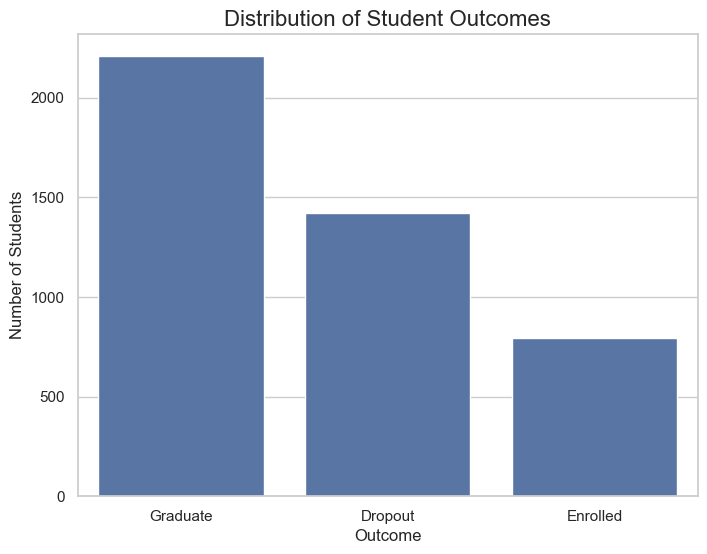

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [10]:
# distribution of 'Status' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Distribution of Student Outcomes', fontsize=16)
plt.xlabel('Outcome')
plt.ylabel('Number of Students')
plt.show()

print(df['Status'].value_counts())

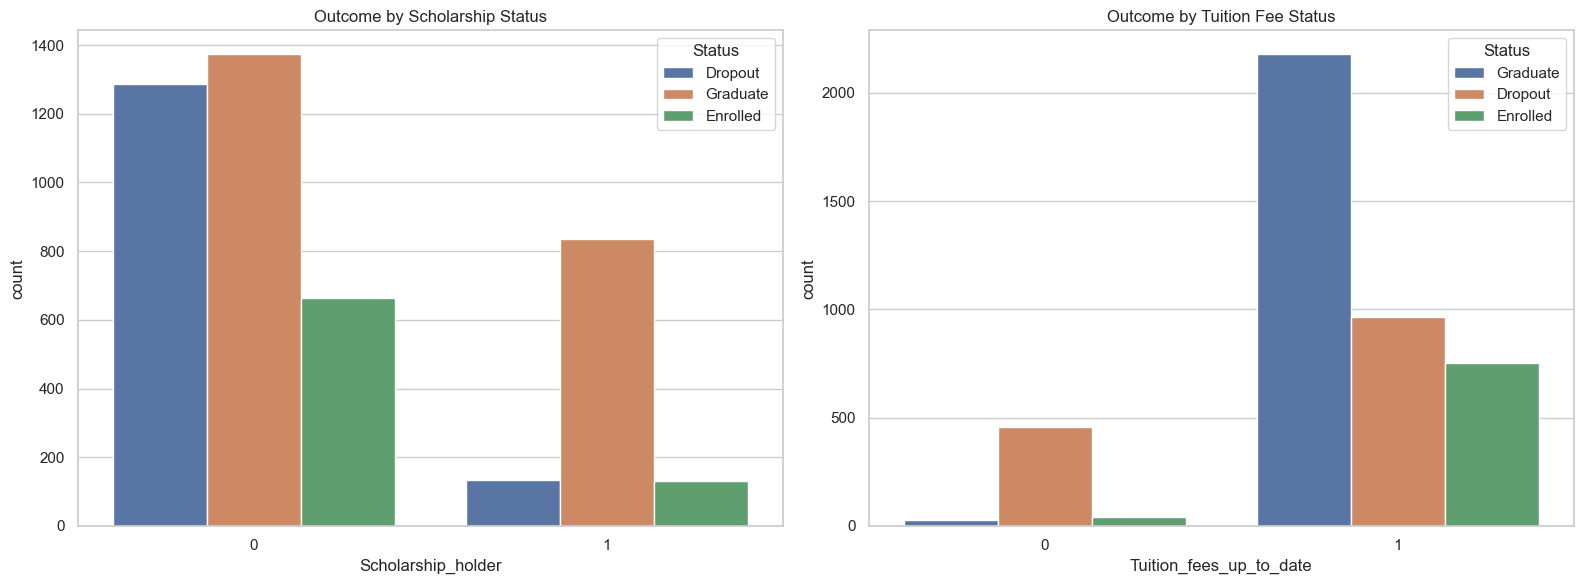

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scholarship holder
sns.countplot(ax=axes[0], data=df, x='Scholarship_holder', hue='Status')
axes[0].set_title('Outcome by Scholarship Status')

# Tuition fees up to date
sns.countplot(ax=axes[1], data=df, x='Tuition_fees_up_to_date', hue='Status')
axes[1].set_title('Outcome by Tuition Fee Status')

plt.tight_layout()
plt.show()

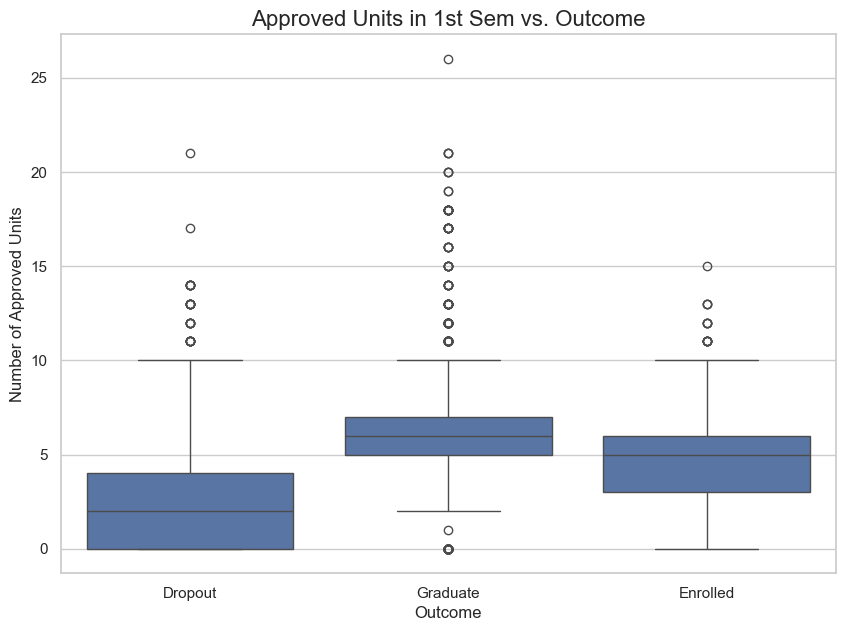

In [12]:
# relationship between approved units and outcome
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved')
plt.title('Approved Units in 1st Sem vs. Outcome', fontsize=16)
plt.xlabel('Outcome')
plt.ylabel('Number of Approved Units')
plt.show()

## Data Preparation / Preprocessing

In [13]:
# Filter DataFrame to include only 'Graduate' and 'Dropout'
df_model = df[df['Status'] != 'Enrolled'].copy()

# Map the 'Status' column to binary values: 1 for Dropout, 0 for Graduate
df_model['Status'] = df_model['Status'].map({'Dropout': 1, 'Graduate': 0})

# Define features (X) and target (y)
X = df_model.drop('Status', axis=1)
y = df_model['Status']

print(f"Shape of our features (X): {X.shape}")
print(f"Shape of our target (y): {y.shape}")
print("\nTarget distribution:")
print(y.value_counts())

Shape of our features (X): (3630, 36)
Shape of our target (y): (3630,)

Target distribution:
Status
0    2209
1    1421
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2904, 36)
X_test shape: (726, 36)


In [18]:
binary_cols = [col for col in X.columns if X[col].nunique() == 2]
numeric_features = [
    'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]
categorical_features = [
    col for col in X.select_dtypes(include=np.number).columns
    if col not in numeric_features and col not in binary_cols
]

In [19]:
# Membuat pipeline preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [20]:
# Menerapkan preprocessing ke data training dan testing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
print(f"Bentuk data training setelah persiapan: {X_train_prepared.shape}")
print("Preprocessing selesai tanpa error.")

Bentuk data training setelah persiapan: (2904, 251)
Preprocessing selesai tanpa error.


## Modeling

In [21]:
# Melatih model Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_prepared, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


In [22]:
# Melatih model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_prepared, y_train)
print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


## Evaluation

In [24]:
print("\nEvaluasi Logistic Regression")
y_pred_log_reg = log_reg.predict(X_test_prepared)
print(classification_report(y_test, y_pred_log_reg, target_names=['Graduate', 'Dropout']))

print("\nEvaluasi Random Forest")
y_pred_rf = rf_clf.predict(X_test_prepared)
print(classification_report(y_test, y_pred_rf, target_names=['Graduate', 'Dropout']))


Evaluasi Logistic Regression
              precision    recall  f1-score   support

    Graduate       0.95      0.94      0.95       442
     Dropout       0.91      0.93      0.92       284

    accuracy                           0.93       726
   macro avg       0.93      0.93      0.93       726
weighted avg       0.93      0.93      0.93       726


Evaluasi Random Forest
              precision    recall  f1-score   support

    Graduate       0.92      0.95      0.94       442
     Dropout       0.92      0.87      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.92       726
weighted avg       0.92      0.92      0.92       726



In [26]:
# Menghitung dan Mencetak Kesimpulan Evaluasi
print("\nKESIMPULAN EVALUASI (DATA TEST)")
# Menghitung recall untuk kelas 'Dropout' (label=1)
recall_log_reg = recall_score(y_test, y_pred_log_reg, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)

print(f"Recall 'Dropout' Logistic Regression: {recall_log_reg:.3f}")
print(f"Recall 'Dropout' Random Forest     : {recall_rf:.3f}")

if recall_log_reg >= recall_rf:
    print("\nModel terbaik adalah Logistic Regression karena memiliki nilai Recall yang lebih tinggi untuk kelas 'Dropout'.")
    print("Ini berarti model lebih baik dalam mengidentifikasi mahasiswa yang berisiko dropout pada data baru.")
    pilihan_model_terbaik = y_pred_log_reg
    nama_model_terbaik = "Logistic Regression"
else:
    print("\nModel terbaik adalah Random Forest karena memiliki nilai Recall yang lebih tinggi untuk kelas 'Dropout'.")
    pilihan_model_terbaik = y_pred_rf
    nama_model_terbaik = "Random Forest"


KESIMPULAN EVALUASI (DATA TEST)
Recall 'Dropout' Logistic Regression: 0.926
Recall 'Dropout' Random Forest     : 0.873

Model terbaik adalah Logistic Regression karena memiliki nilai Recall yang lebih tinggi untuk kelas 'Dropout'.
Ini berarti model lebih baik dalam mengidentifikasi mahasiswa yang berisiko dropout pada data baru.


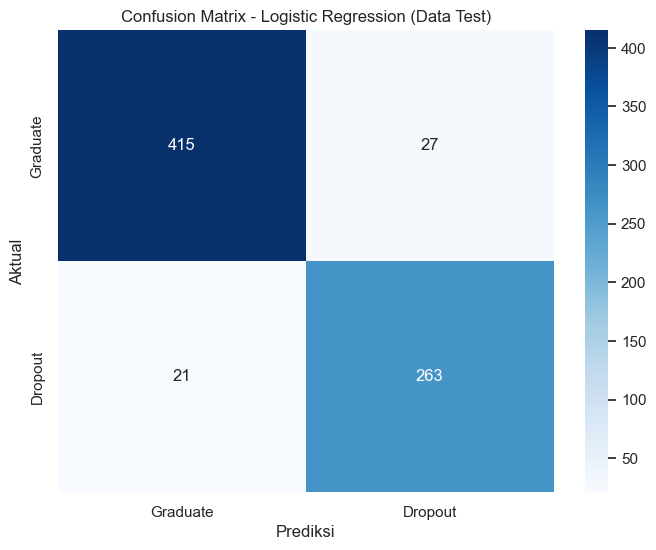

In [27]:
# Visualisasi Confusion Matrix untuk Model Terbaik pada Data Test
cm = confusion_matrix(y_test, pilihan_model_terbaik)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title(f'Confusion Matrix - {nama_model_terbaik} (Data Test)')
plt.show()

## Penyimpanan Model (Model Saving)

In [30]:
os.makedirs('model', exist_ok=True)

# Menyimpan preprocessor dan model terbaik (Logistic Regression)
model_to_save = {
    'preprocessor': preprocessor,
    'model': log_reg
}

# Menyimpan file ke dalam folder 'model'
with open('model/dropout_predictor.pkl', 'wb') as f:
    pickle.dump(model_to_save, f)

print("Folder 'model' sudah siap.")
print("Model dan preprocessor berhasil disimpan ke 'model/dropout_predictor.pkl'")

Folder 'model' sudah siap.
Model dan preprocessor berhasil disimpan ke 'model/dropout_predictor.pkl'
